In [1]:
%pylab notebook
%matplotlib notebook
import os, glob
import numpy as np
from matplotlib.pyplot import imshow
from matplotlib import cm
import matplotlib.pyplot as plt
import rawpy
import imageio

Populating the interactive namespace from numpy and matplotlib


In [2]:
fname = '../astrophotography_data/MilkyWayPrettyBoy/tests/3200_DSC03659.ARW'

In [3]:
raw = rawpy.imread(fname)
imarray = raw.raw_image

<IPython.core.display.Javascript object>


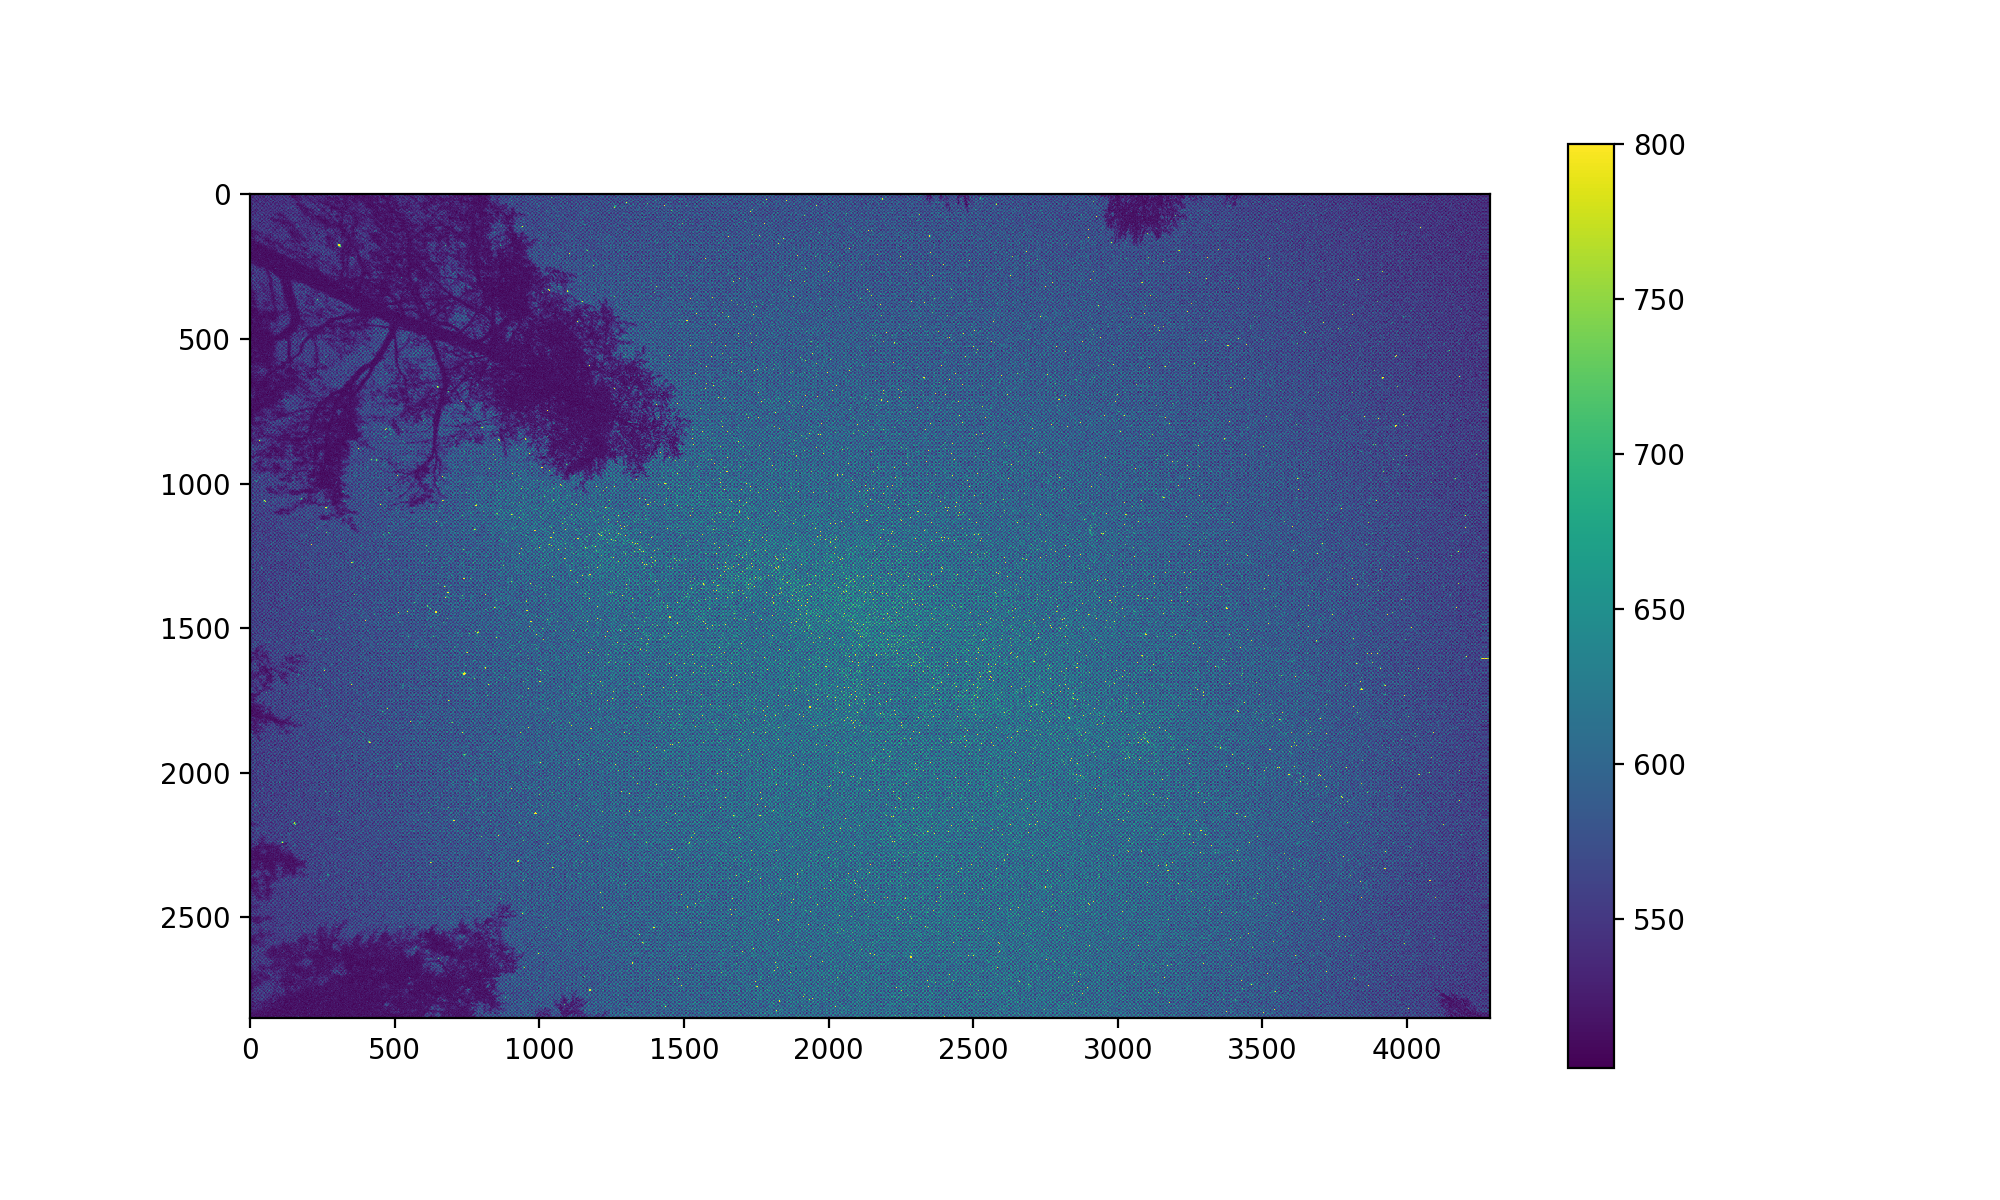

In [4]:
plt.figure(figsize=[10, 6])
plt.imshow(imarray, vmin=502, vmax=800)
plt.colorbar()

In [5]:
colors_array = raw.raw_colors
mask = np.ones(shape=colors_array.shape)
red_mask = np.where(colors_array == 0, 1, 0)
green_mask_1 = np.where(colors_array == 1, 1, 0)
green_mask_2 = np.where(colors_array == 3, 1, 0)
green_mask = green_mask_1 | green_mask_2
blue_mask = np.where(colors_array == 2, 1, 0)

<IPython.core.display.Javascript object>


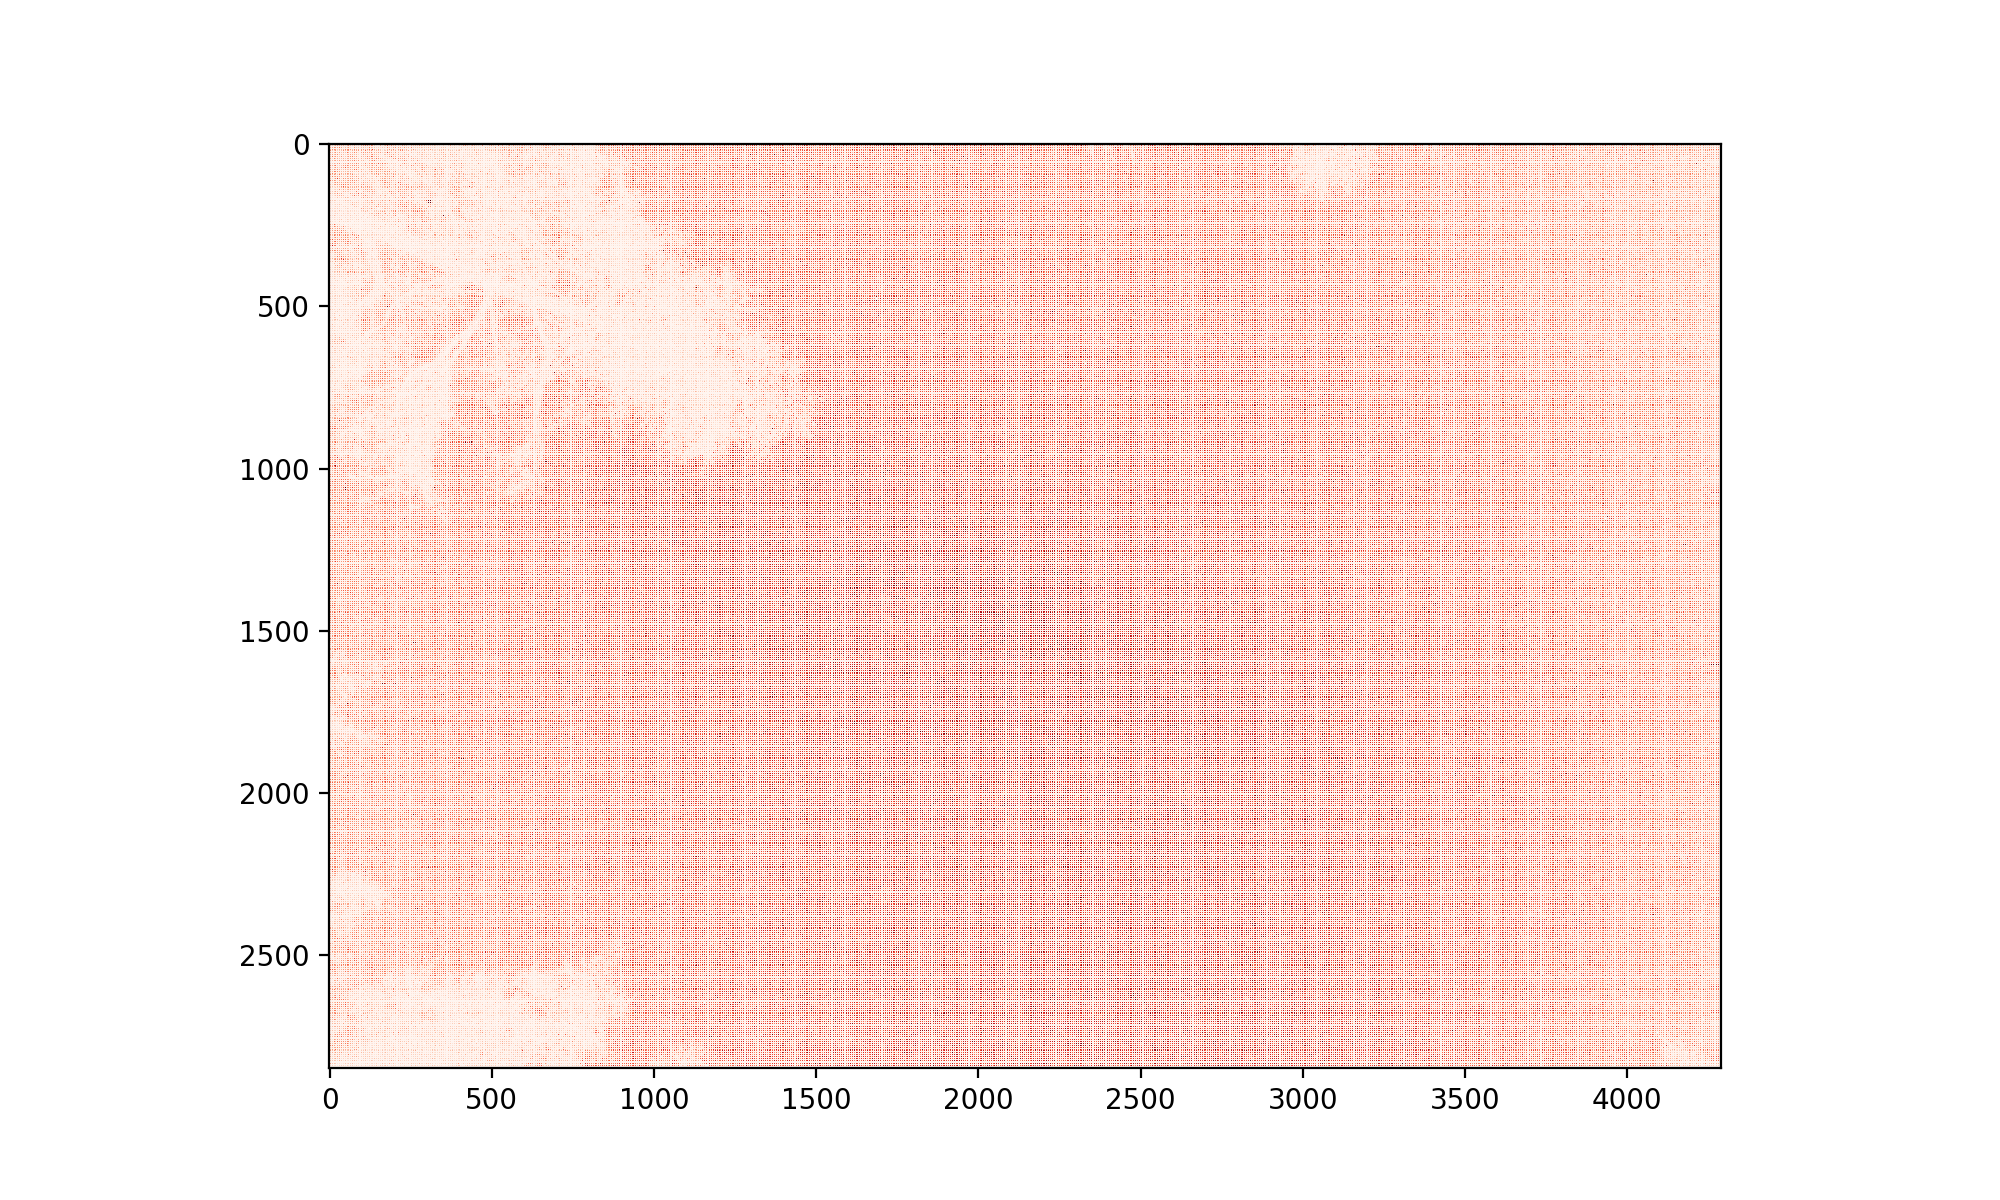

In [6]:
plt.figure(figsize=[10, 6])
plt.imshow(imarray * red_mask, cmap='Reds', vmin=500, vmax=600)

<IPython.core.display.Javascript object>


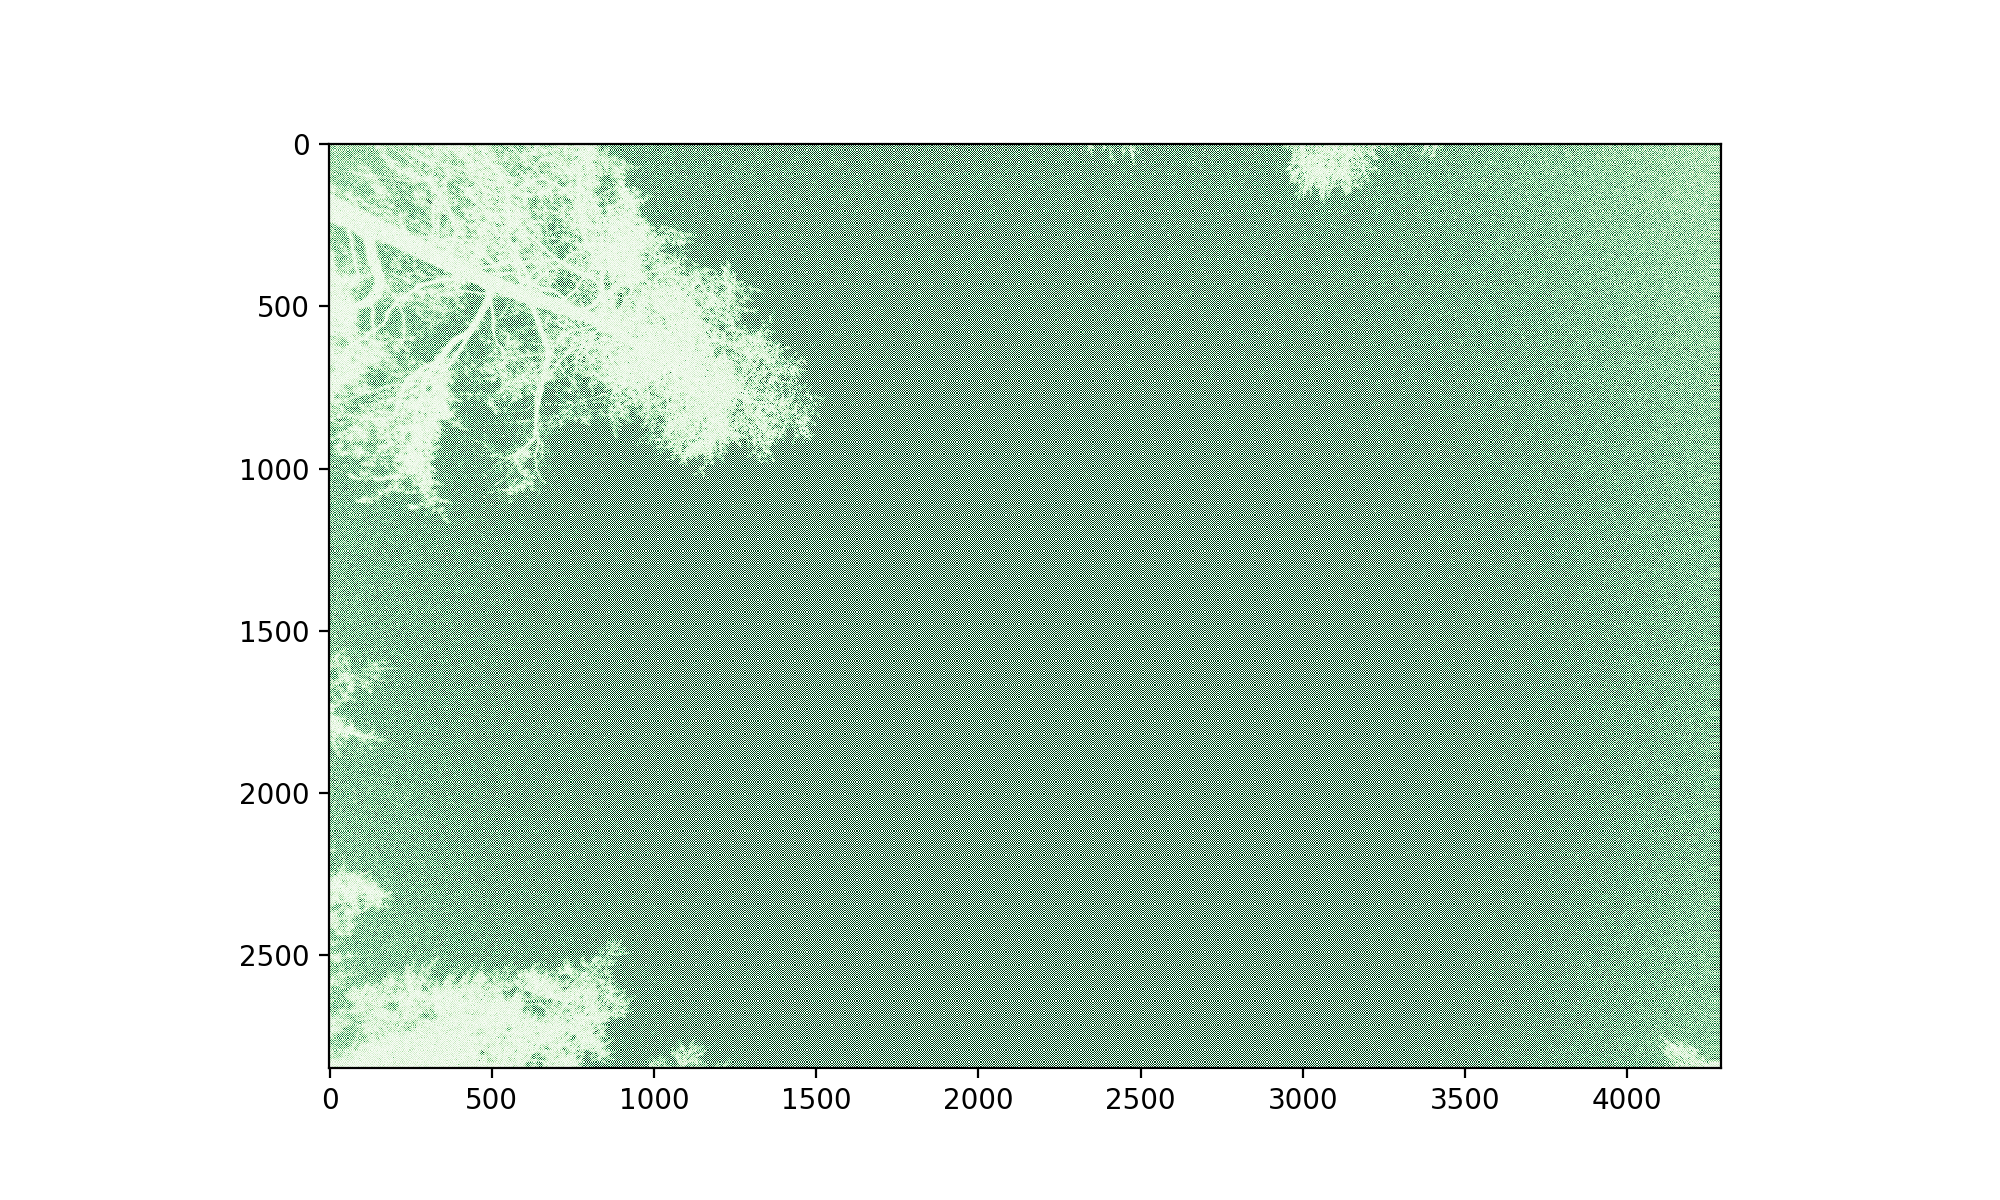

In [7]:
plt.figure(figsize=[10, 6])
plt.imshow(imarray * green_mask, cmap='Greens', vmin=500, vmax=600)

<IPython.core.display.Javascript object>


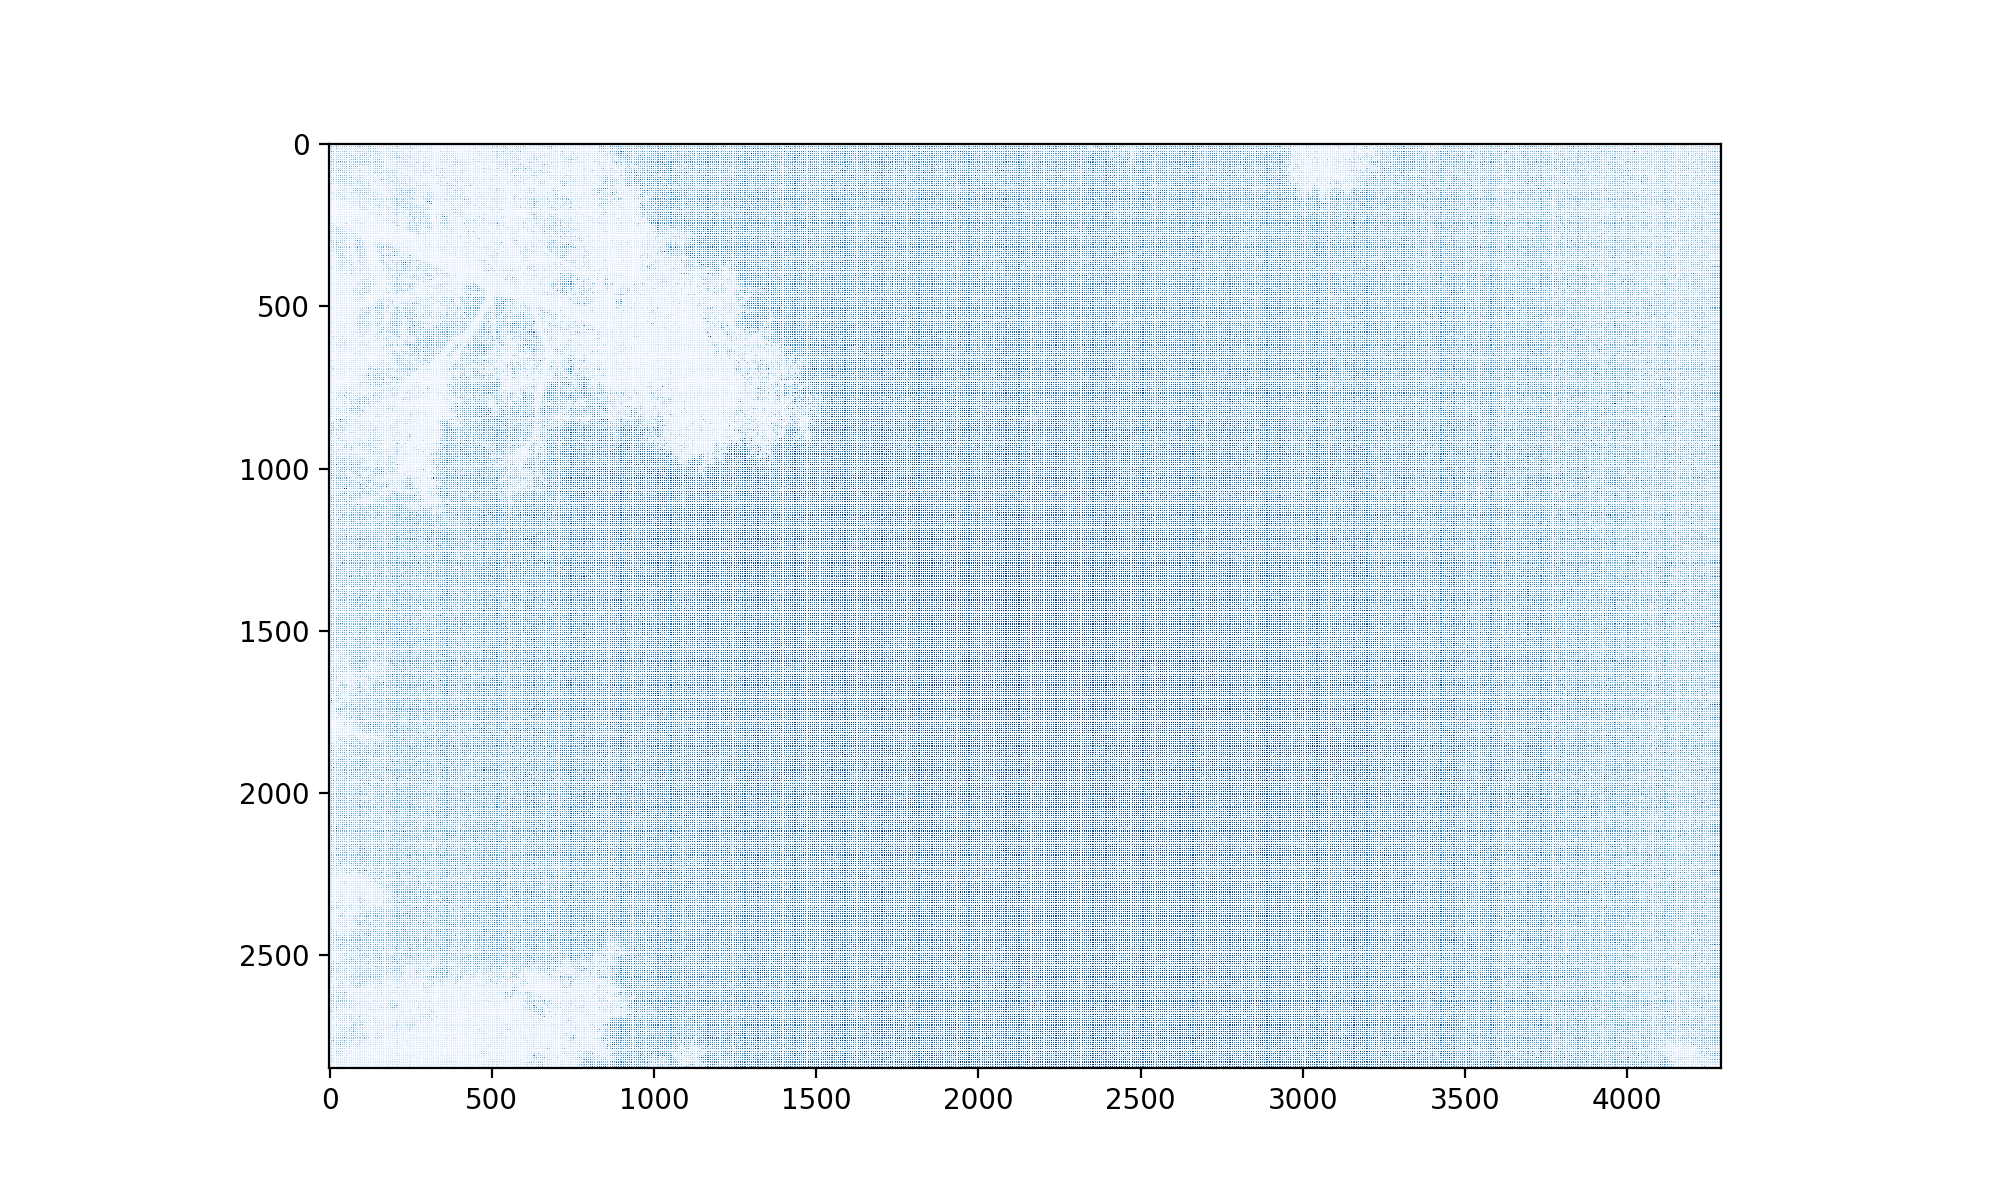

In [8]:
plt.figure(figsize=[10, 6])
plt.imshow(imarray * blue_mask, cmap='Blues', vmin=500, vmax=600)

In [9]:
aslice = np.index_exp[1170:1220,1970:2030]

<IPython.core.display.Javascript object>


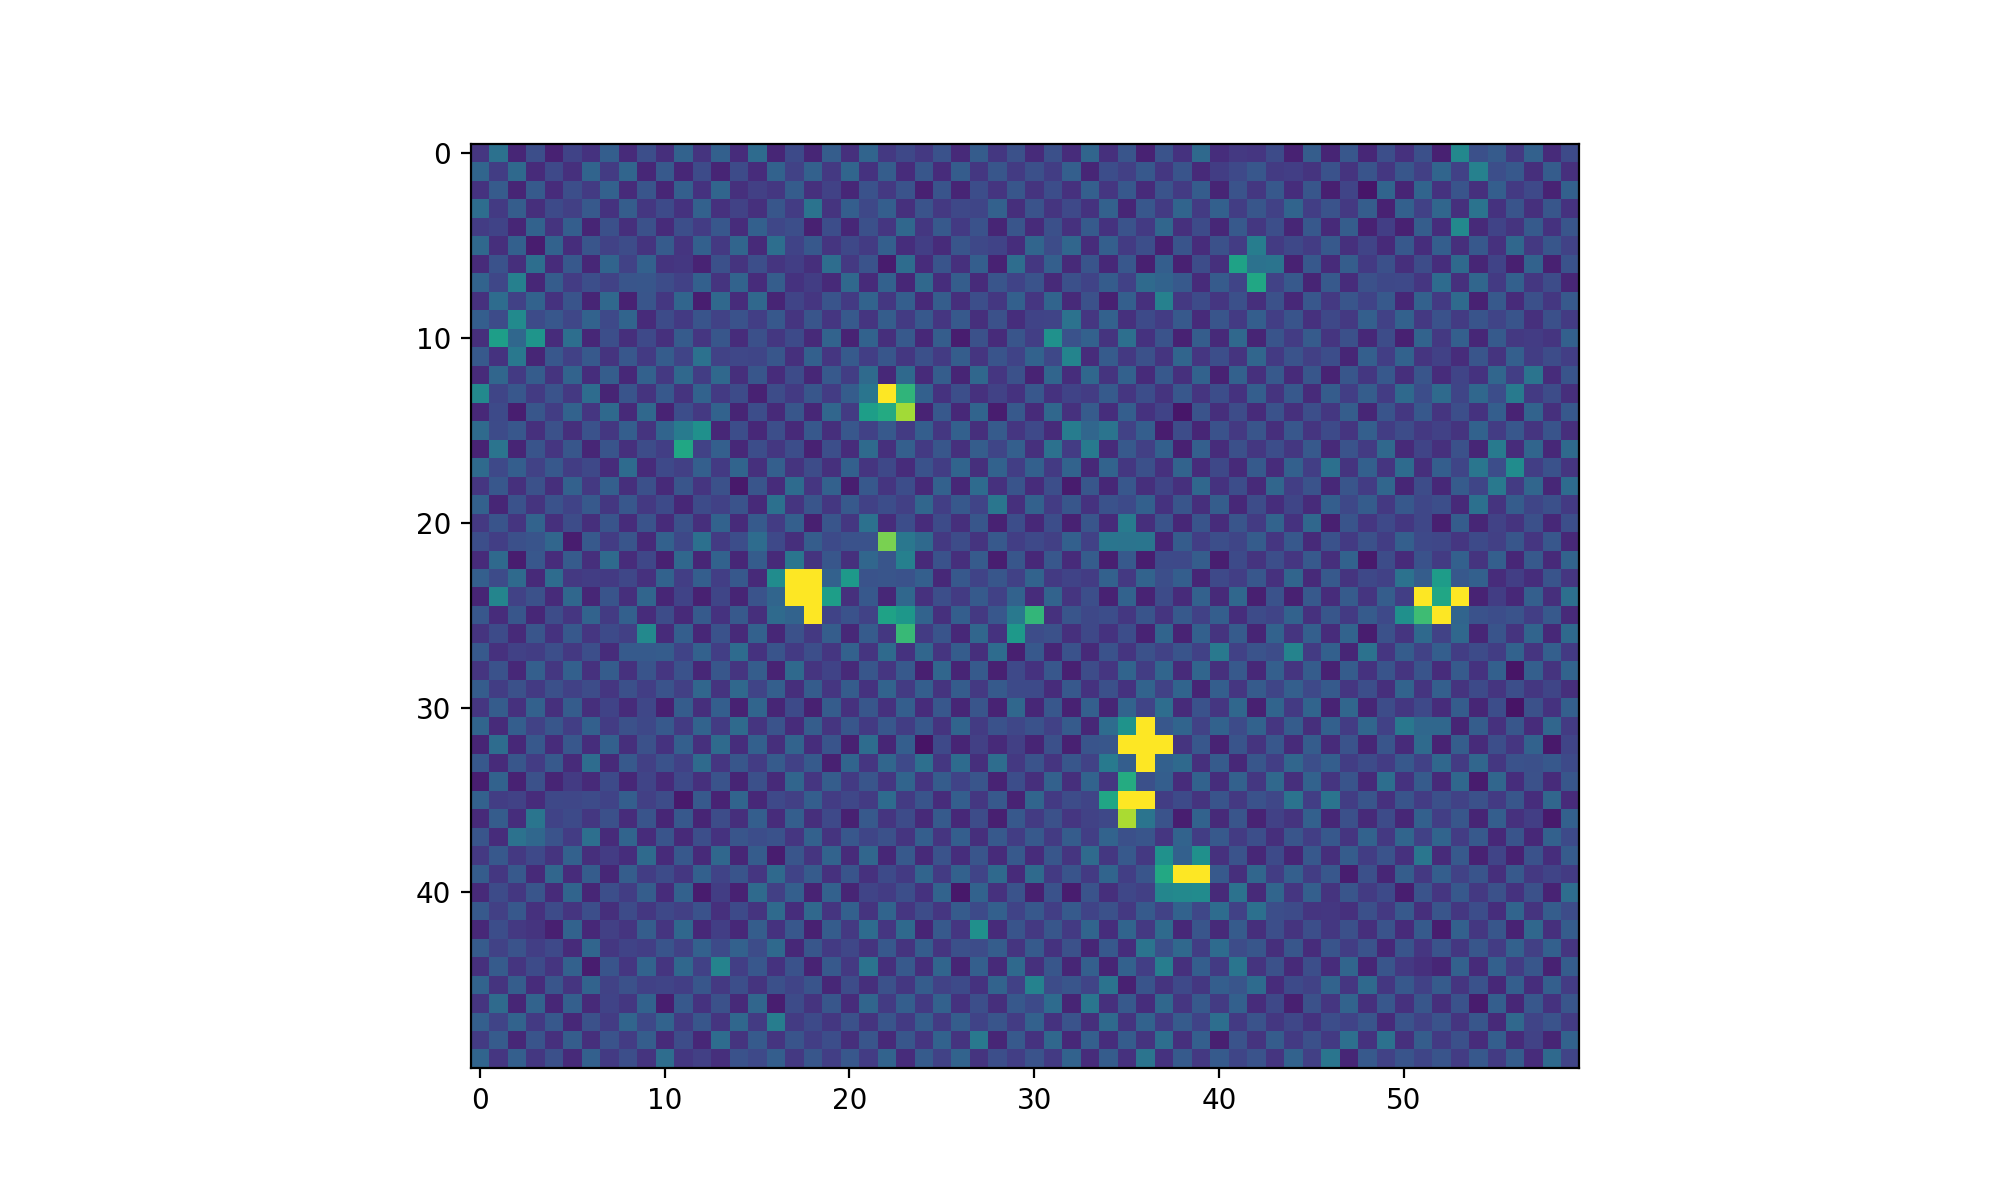

In [10]:
plt.figure(figsize=[10, 6])
plt.imshow(imarray[aslice], vmin=502, vmax=1000)

In [11]:
gray = imarray[aslice]
red = (imarray * red_mask)[aslice]
green = (imarray * green_mask)[aslice]
blue = (imarray * blue_mask)[aslice]

<IPython.core.display.Javascript object>


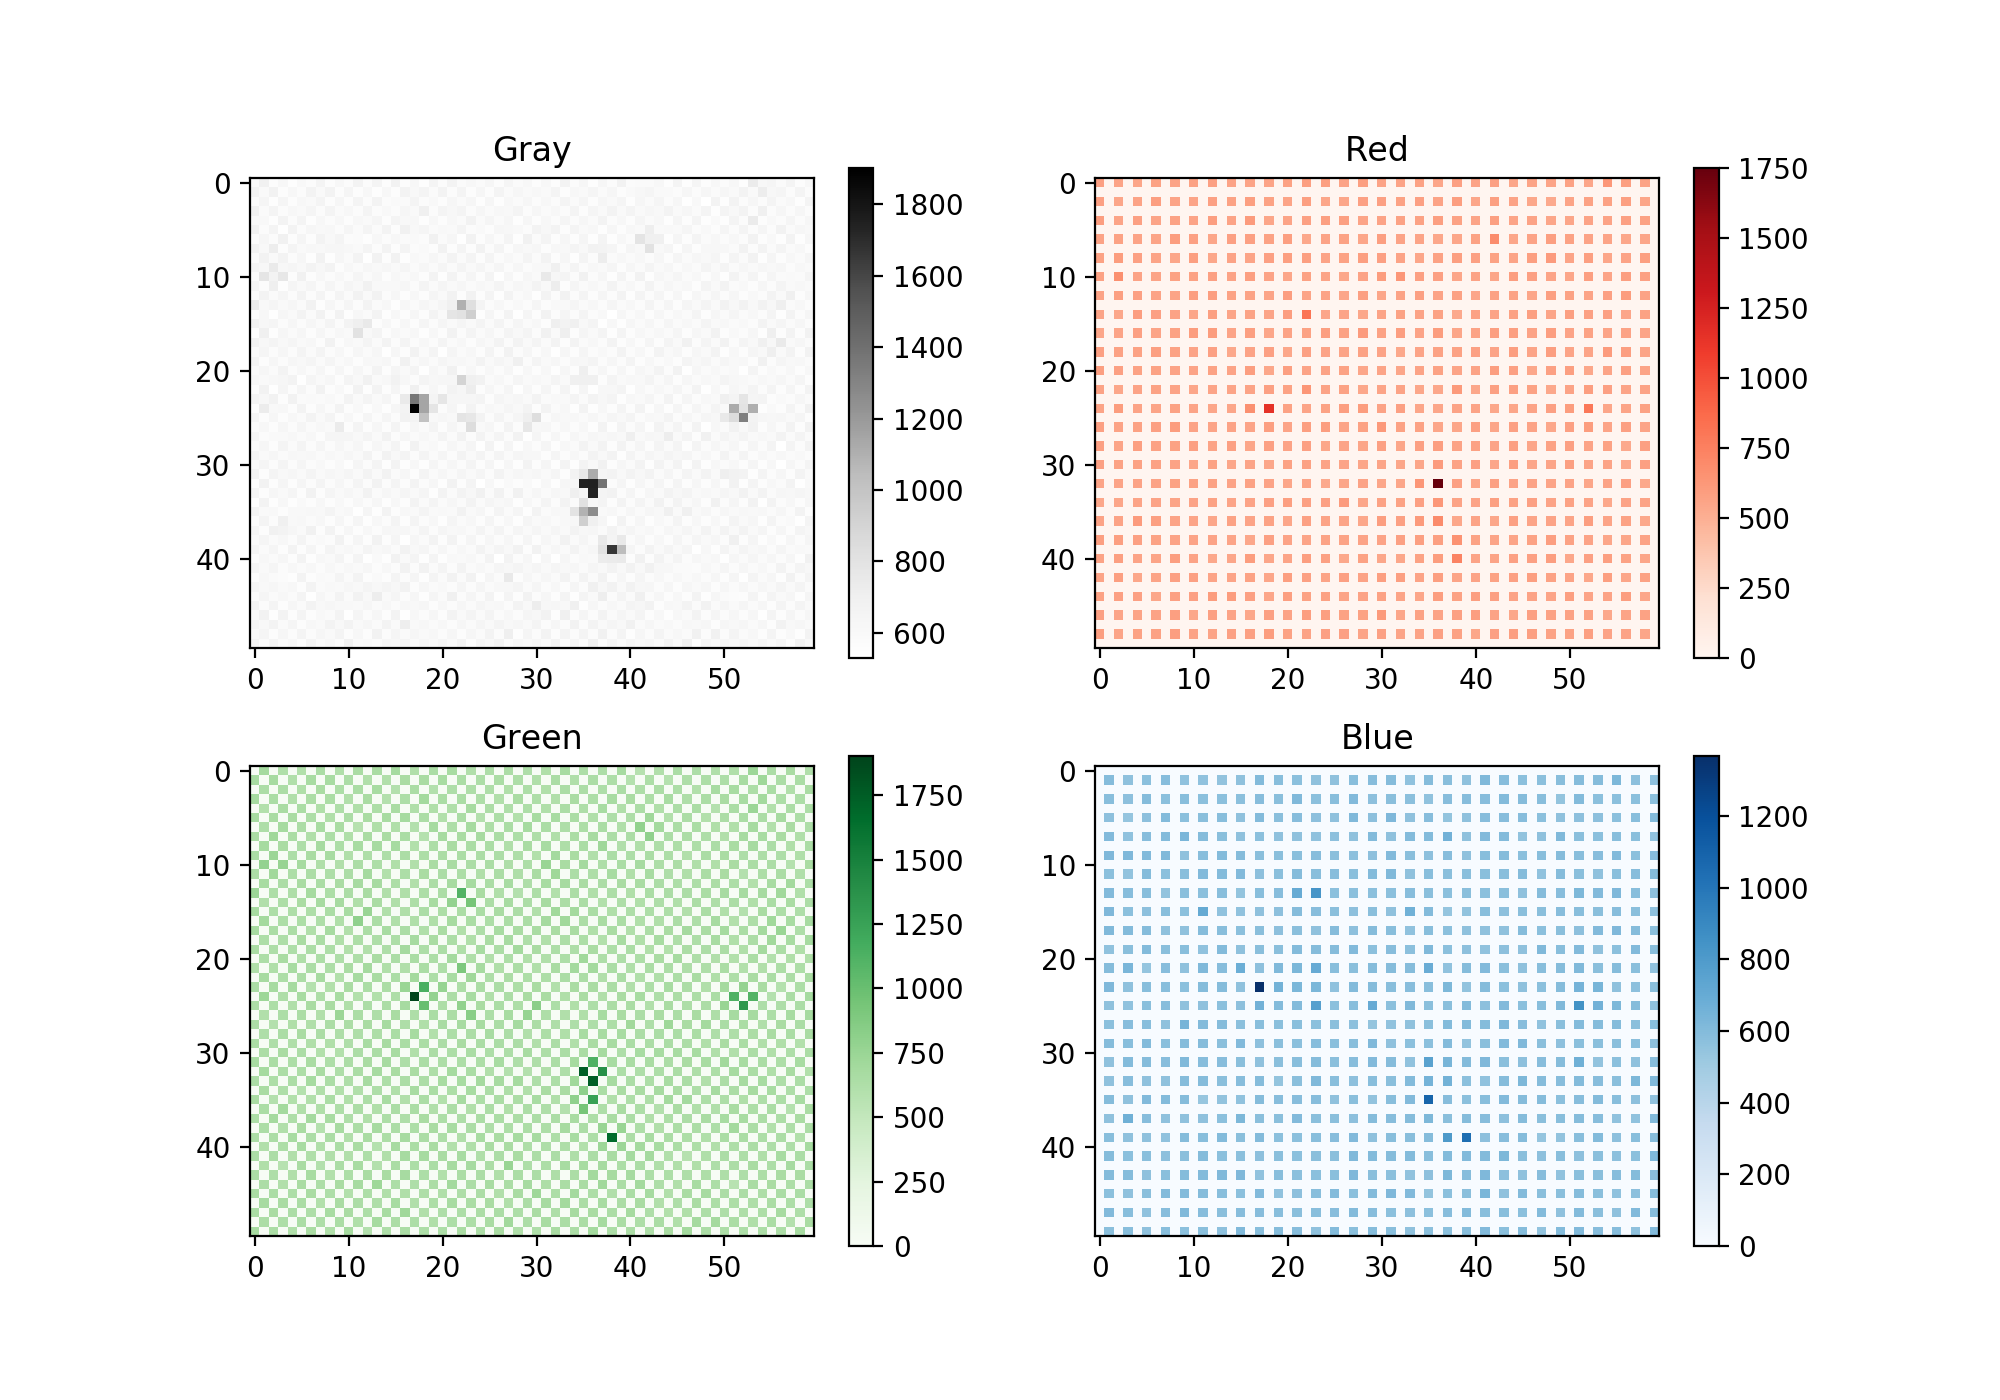

In [13]:
figsize(10,7)
colors = ['Gray','Red','Green','Blue']

fig = plt.figure() 
ax = None
for color, bar, i in zip([gray, red, green, blue], ['Greys','Reds','Greens','Blues'], range(0,4)):
    if ax is None:
        ax = fig.add_subplot(2, 2, i+1)
        ax.set_title(colors[i])    
    else:
        ax1 = fig.add_subplot(2, 2, i+1, sharex=ax, sharey=ax)
        ax1.set_title(colors[i])    
    plt.imshow(color, cmap=bar)
    plt.colorbar()
    a.set_title(colors[i])    
plt.show()